# BatSim

This notebook is designed to retrieve the exact results mentioned in the paper based on the Job IDs of the circuits executed on real IBM backends.

We have added a module called `Jobs` with two attributes, `RetrieveUnconditional` and `RetrieveDaemonic`, responsible for retrieving the results for unconditional and Daemonic work extraction, respectively.

In the first part, we retrieve the plots related to the Physical model, and in the final part, we focus on the RyCnot model.

Please note that running the code does not require internet accessibility.


In [26]:
# Importing necessary modules and classes from BatSim package
from BatSim.Physical import Unconditional, Daemonic  # Importing Unconditional and Daemonic from RyCnot. If you intend to use the Physical model in the code, you need to replace 'RyCnot' with 'Physical'.
from BatSim.Calibration import Data  # Importing Data from Calibration
from BatSim import Jobs
from BatSim.Plot import data_plot  # Importing data_plot from Plot

# Importing necessary functions and constants
from math import pi, sqrt, exp  # Importing pi, sqrt, and exp functions/constants from math module

# Importing Qiskit Aer Simulator from qiskit_aer package
from qiskit_aer import AerSimulator

import pandas as pd


# Define Initial Parameters

In this cell, we will set the parameters for running the code. These parameters include the number of steps we want the collisional model to perform and omega and kappa, which are the parameters for the physical Hamiltonian model. Finally, we will specify the number of shots we aim to run the circuits.

In [27]:
Steps = 10  # Number of steps for the collisional model
alpha = 1  # drving field parameter for the physical Hamiltonian model
kappa = 2 # coupling parameter for the physical Hamiltonian model
shots = 10000  # Number of shots for running the circuit
figure_num = 0 #In the paper, there are four samples for the two modes of paramters \kappa =  1 or 2. To have the first, seocond, third and the fourth plots, you have to put 0, 1, 2 and 3 respectively 


In [28]:
# Obtaining the Job ids 
# Calling the CSV file associated with the Physcial model which includes information about Job ids, calibration and noise parameters.
file_path = f'Jobs/Physical/Jobs_Physical_kappa={kappa}-{figure_num}.csv'  # Update the path as necessary
df = pd.read_csv(file_path, header=None)

# Convert the dataframe to a list of lists
data_list = df.values.tolist()
Job0, Job1, Job2, Job3, Job4, Job5 = f'{data_list[5][0]}', f'{data_list[6][0]}', f'{data_list[7][0]}', f'{data_list[8][0]}', f'{data_list[9][0]}', f'{data_list[10][0]}'

# Circuit Executions (Noisy)

This cell is responsible for retrieving the results for the physical model in the noisy case. The noise and calibration parameters are saved and called from the CSV file.

In [29]:
# Obtain noise parameters from the CSV file
P01, P10, pa, pd = float(data_list[1][0]),float(data_list[2][0]), float(data_list[3][0]), float(data_list[4][0])

omega = alpha 
# Calculate theoretical results using the Daemonic module for passive energy after optimal unitary work extraction
Passive_Theory = Daemonic.Theory(Steps=Steps,omega = omega, kappa = kappa, pa=pa, pd=pd, P01=P01, P10=P10)

# Retrive the results for the Daemonic work extraction on the backend to calculate the passive energy
Passive_Im = Jobs.RetrieveDaemonic_offline(Jobid = Job0, mode = "Physical", Steps = Steps,  shots = shots)

# Calculate theoretical results using the Unconditional module for passive energy and ergotropy
Energy_Theory, Ergotropy_Theory = Unconditional.Theory(Steps=Steps, omega = omega, kappa = kappa, pa=pa, pd=pd)

# Retrive the results for the Unconditional model on the backend to get unconditional work extraction and final energy
Energy_Im, Ergotropy_Im = Jobs.RetrieveUnconditional_offline(Jobid1 = Job1, Jobid2 = Job2, mode = "Physical", Steps = Steps, shots = shots)

# Calculate the theoretical and implemented Daemonic results.
Daemonic_Theory = [xi - yi for xi, yi in zip(Energy_Theory, Passive_Theory)]
Daemonic_Im = [xi - yi for xi, yi in zip(Energy_Im, Passive_Im)]


# Circuit Executions (Ideal)


This cell is responsible for retrieving the results for the physical model in the noisy case. The noise and calibration parameters are saved and called from the CSV file.

In [30]:
P01, P10, pa, pd = 0, 0, 0, 0
Passvie_TheoryIdeal = Daemonic.Theory(Steps = Steps,omega = omega, kappa = kappa , pa = pa , pd = pd, P01 =P01 , P10 = P10)
Passive_ImIdeal =  Jobs.RetrieveDaemonic_offline(Jobid = Job3, mode = "Physical", Steps = Steps,  shots = shots)
Energy_TheoryIdeal, Ergotropy_TheoryIdeal     = Unconditional.Theory(Steps = Steps,  omega = omega, kappa = kappa, pa = pa , pd = pd)
Energy_ImIdeal    , Ergotropy_ImIdeal         = Jobs.RetrieveUnconditional_offline(Jobid1 = Job4, Jobid2 = Job5, mode = "Physical", Steps = Steps, shots = shots)
Daemonic_TheoryIdeal = [xi - yi for xi, yi in zip(Energy_TheoryIdeal, Passvie_TheoryIdeal )]
Daemonic_ImIdeal     = [xi - yi for xi, yi in zip(Energy_ImIdeal    ,      Passive_ImIdeal)]

# Standart Deviation

In [31]:

delte_E_init2 = [] 
delta_E_fin_2 = [] 
std_curve = []

for item in Energy_Im:
    std = item*(1 - item)
    delte_E_init2.append(std)
for item in Passive_Im:
    std = item*(1 - item)
    delta_E_fin_2.append(std)


for i in range(len(Energy_Im)):
    std = sqrt((delte_E_init2[i] + delta_E_fin_2[i])/shots)
    std_curve.append(std)

delte_E_init2 = [] 
delta_E_fin_2 = [] 
std_curveIdeal = []

for item in Energy_ImIdeal:
    std = item*(1 - item)
    delte_E_init2.append(std)
for item in Passive_ImIdeal:
    std = item*(1 - item)
    delta_E_fin_2.append(std)


for i in range(len(Energy_ImIdeal)):
    std = sqrt((delte_E_init2[i] + delta_E_fin_2[i])/shots)
    std_curveIdeal.append(std)

# Plotting the Results 

In the next three cells, we plot the results for the noisy case, the ideal case, and a comparison plot, respectively.

c:\Users\Navid Elyasi\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\Navid Elyasi\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
e:\Thesis\Prof.Marco Genoni\OQB-implementation---Batsim\BatSim\Plot\data_plot.py:117: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-o" (-> linestyle='-'). The keyword argument will take precedence.
  plt.errorbar(x_axis, Daemonic_Im, yerr=std_dev, color='orange', linestyle='dashed', fmt='-o', markersize=4, label= r'$\overline{\mathcal{W}}_{\{\tilde{\Pi}_{{\bf a}_n},\hat{U}_{{\bf a}_n}^{\sf noisy} \} }$')
e:\Thesis\Prof.Marco Genoni\OQB-implementation---Batsim\BatSim\Plot\data_plot.py:118: UserWarning: linestyle is red

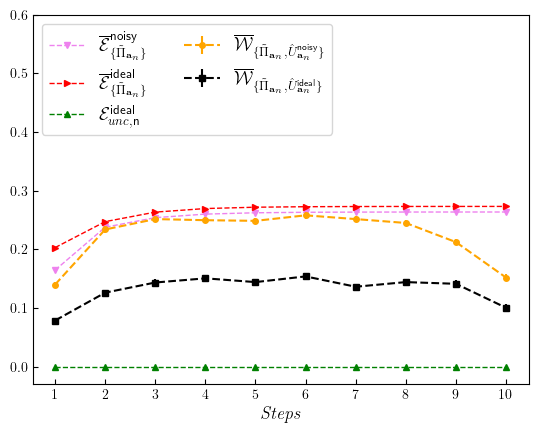

In [32]:
data_plot.compare(std_dev = std_curve, 
                  std_devIdeal = std_curveIdeal,
                  Ergotropy_TheoryIdeal=Ergotropy_TheoryIdeal, 
                  error =True,
                  Ergotropy_ImIdeal=Ergotropy_ImIdeal,
                  Daemonic_Theory=Daemonic_Theory,  
                  Daemonic_TheoryIdeal=Daemonic_TheoryIdeal, 
                  Daemonic_Im=Daemonic_Im, 
                  Daemonic_ImIdeal=Daemonic_ImIdeal,
                  noise = True,
                  legend= True, 
                  file_name=f"compare_Physical_noise_kappa={kappa}_{figure_num}",
                  kappa = kappa)

e:\Thesis\Prof.Marco Genoni\OQB-implementation---Batsim\BatSim\Plot\data_plot.py:123: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-D" (-> linestyle='-'). The keyword argument will take precedence.
  plt.errorbar(x_axis, Daemonic_ImIdeal, yerr=std_dev, color='black', linestyle='dashed', fmt='-D', markersize=4, label= r'$\overline{\mathcal{W}}_{\{\tilde{\Pi}_{{\bf a}_n},\hat{U}_{{\bf a}_n}^{\sf ideal} \} }$')


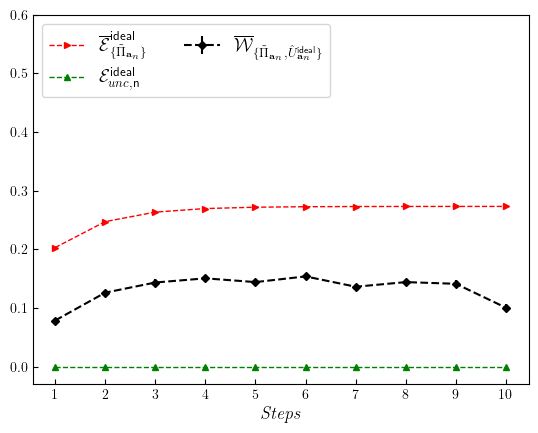

In [33]:
data_plot.compare(std_dev = std_curve, 
                  std_devIdeal = std_curveIdeal,
                  Ergotropy_TheoryIdeal=Ergotropy_TheoryIdeal, 
                  error =True,
                  Ergotropy_ImIdeal=Ergotropy_ImIdeal,
                  Daemonic_Theory=Daemonic_Theory,  
                  Daemonic_TheoryIdeal=Daemonic_TheoryIdeal, 
                  Daemonic_Im=Daemonic_Im, 
                  Daemonic_ImIdeal=Daemonic_ImIdeal,
                  noise = False,
                  legend= True, 
                  file_name=f"Physical_nonoise_kappa={kappa}_{figure_num}",
                  kappa = kappa)